In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

% matplotlib inline

#### Jet Flow

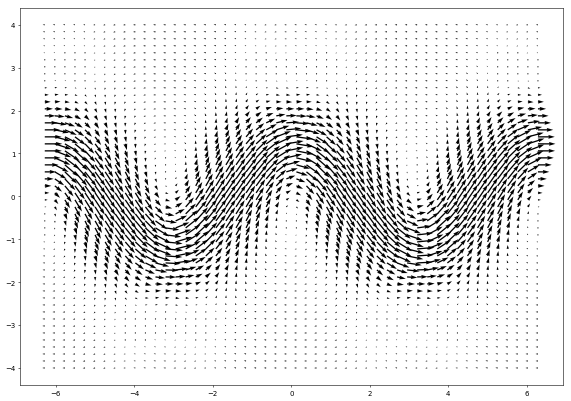

In [3]:
##Size of the system 
m, n = 2*np.pi, 4;

##Parameters
A, C = 1.2, 0.12; #Field
h = 1E-4; #Numerical Derivate

##Campo
def Field_Funct(x,y):
    Field = C*y - np.tanh( ( y - A*np.cos(x) ) / np.sqrt( 1 + A**2*(np.sin(x))**2 ) )
    return Field

##Meshgrid
x = np.linspace(-m,m,50);
y = np.linspace(-n,n,50);

##Derivadas numericas
Spx = np.zeros((len(y),len(x))); Spy = np.zeros((len(y),len(x)));
for ii in xrange(len(x)):
    for jj in xrange(len(y)):
        Spx[jj,ii] = - ( Field_Funct( x[ii], y[jj] + h ) - Field_Funct( x[ii], y[jj] - h ) ) / ( 2*h ) ;
        Spy[jj,ii] = ( Field_Funct( x[ii] + h, y[jj] ) - Field_Funct( x[ii] - h, y[jj]) ) / ( 2*h ) ;
        
##Figure
plt.figure(1, figsize=(14, 10), dpi=50)
Q = plt.quiver(x, y, Spx, Spy)

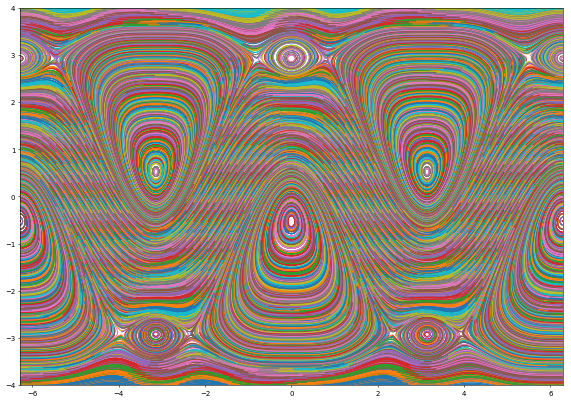

In [130]:
##Size of the system 
m, n = 2*np.pi, 4;

##Parameters
A, C = 1.2, 0.12; #Field
h = 1E-4; #Numerical Derivate
Tmax = 50; dt = 0.01; #Tracks

##Campo
def Field_Funct(x,y):
    Field = C*y - np.tanh( ( y - A*np.cos(x) ) / np.sqrt( 1 + A**2*(np.sin(x))**2 ) )
    return Field

##Meshgrid
x = np.linspace(-m - 2,m + 2,100);
y = np.linspace(-n,n,100);

for ii in xrange(len(x)):
    for jj in xrange(len(y)):
        ##Trayectories
        Tx = []; Ty = []; t = 0;
        ##Initial Conditions
        xo = x[ii]; yo = y[jj];
        Tx.append(xo); Ty.append(yo);
        while t < Tmax:
            x1 = xo + ( - ( Field_Funct( xo, yo + h ) - Field_Funct( xo, yo - h ) ) / ( 2*h ) ) * dt;
            yo = yo + ( ( Field_Funct( xo + h, yo ) - Field_Funct( xo - h, yo ) ) / ( 2*h ) ) * dt; xo = x1*1;
            Tx.append(xo); Ty.append(yo);
            t += dt;
            
        plt.figure(2,figsize=(14, 10), dpi=50);
        plt.plot(Tx,Ty);
        plt.ylim(-n,n);
        plt.xlim(-m,m);

#### Standard Map Kam

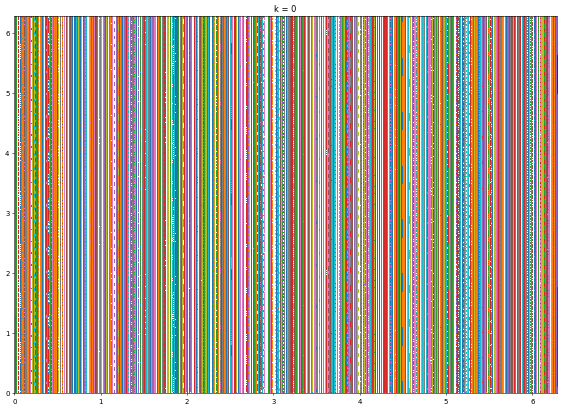

In [46]:
##Size of the system 
m, n = 2*np.pi, 2*np.pi;

##Params
N = 10**3;
k = 0;
M = 10**3;

##Random Initaial Conditions
for zz in xrange(M):
    ##Initial Condition
    xo = np.random.random()*m; yo = np.random.random()*n;
    ##Map
    Xvec = []; Yvec = [];
    Xvec.append(xo); Yvec.append(yo);
    for ii in xrange (N):
        xo = ( xo + k*np.sin(yo) ) % (2*np.pi)
        yo = ( xo + yo ) % (2*np.pi)
        Xvec.append(xo); Yvec.append(yo);
    ##Figure
    plt.figure(4,figsize=(14, 10), dpi=50);
    plt.plot(Xvec,Yvec,',');
    plt.ylim(0,n);
    plt.xlim(0,m);
    plt.title('k = 0')

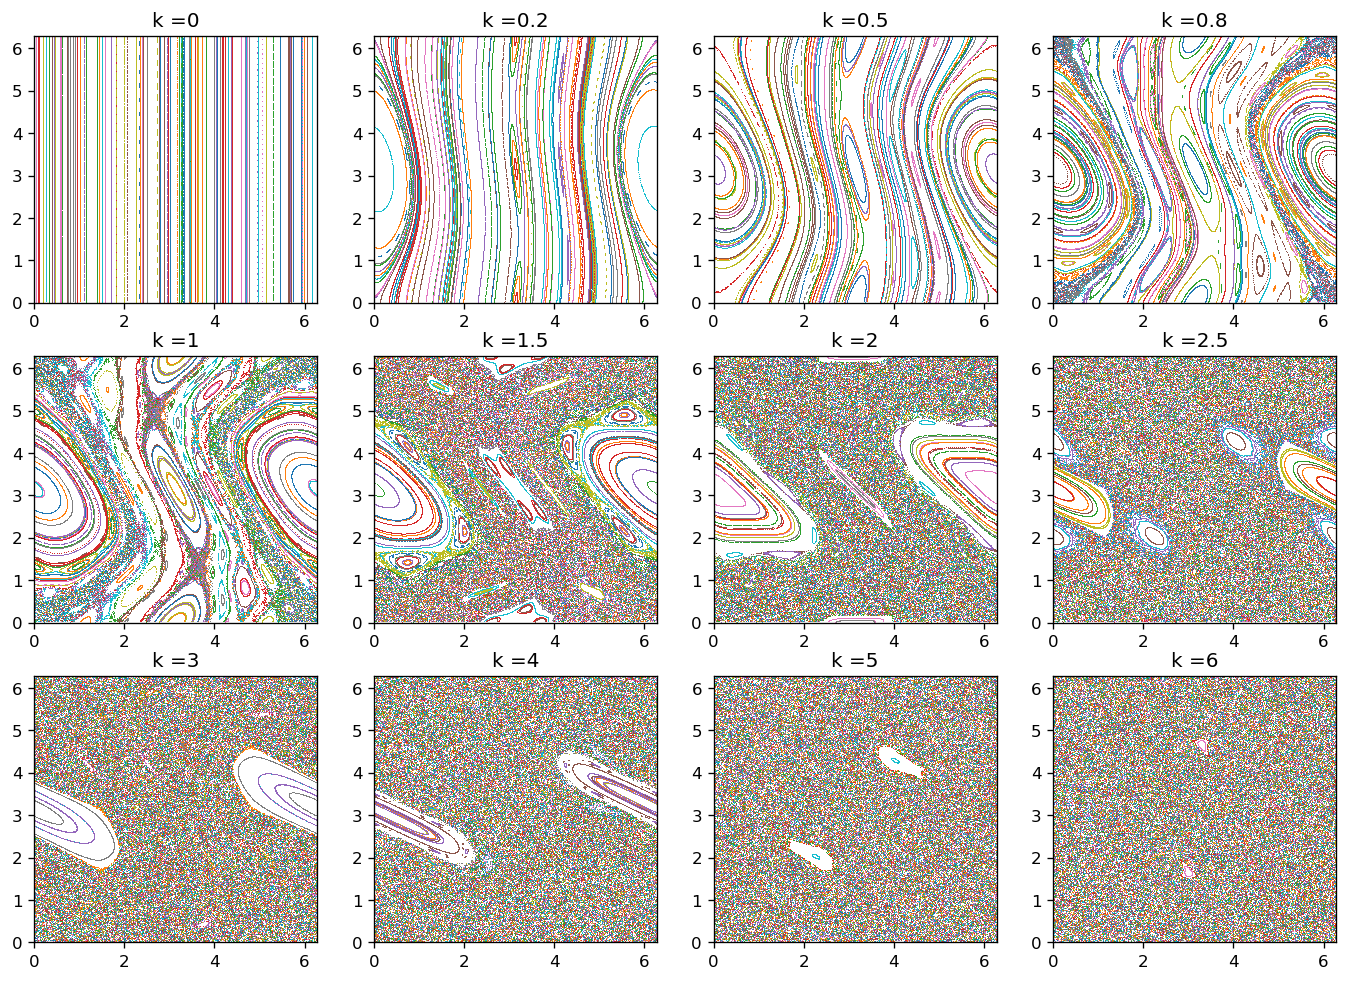

In [132]:
##Size of the system 
m, n = 2*np.pi, 2*np.pi;

##Params
N = 10**3;
kvec = [0,0.2,0.5,0.8,1,1.5,2,2.5,3,4,5,6];
M = 100;

for ss in xrange(len(kvec)):
    k = kvec[ss];
    ##Random Initaial Conditions
    for zz in xrange(M):
        ##Initial Condition
        xo = np.random.random()*m; yo = np.random.random()*n;
        ##Map
        Xvec = []; Yvec = [];
        Xvec.append(xo); Yvec.append(yo);
        for ii in xrange (N):
            yo = ( xo + yo ) % (2*np.pi); 
            xo = ( xo + k*np.sin(yo) ) % (2*np.pi)
            Xvec.append(xo); Yvec.append(yo);
        ##Figure
        plt.figure(5,figsize=(14, 10), dpi=120);
        plt.subplot(3,4,ss+1);
        plt.plot(Xvec,Yvec,',');
        plt.ylim(0,n);
        plt.xlim(0,m);
        plt.title('k =' + str(k))

#### Sine Flow

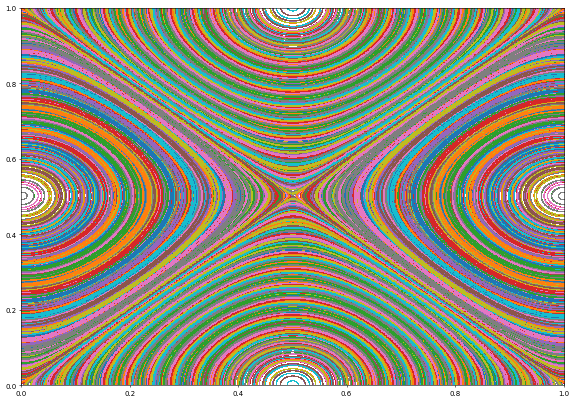

In [14]:
##Param
m, n = 1, 1;
U, T, L = 0.1, 0.1, 1 # Velocity, Time const, Charact. Lenght
Tmax = 250; dt = 0.01;
N = 500; #Number of tracks


##Meshgrid
x = np.linspace(-m,m,50);
y = np.linspace(-n,n,50);

for ss in xrange(len(x)):
    for zz in xrange(len(y)):
        #Initial Conditions
        xo = x[ss]; yo = y[zz];
        ##Tracks
        X = []; Y = [];
        X.append(xo); Y.append(yo);
        ##Map
        t = 0;
        while t < Tmax:
            tt = t % T;
            if tt <= (T/2):
                vx = U*np.sin( ( 2*np.pi*yo ) / L );
                vy = 0;
            elif tt > (T/2):
                vx = 0;
                vy = U*np.sin( ( 2*np.pi*xo ) / L );
            xo = xo + vx*dt; yo = yo + vy*dt;
            if xo > ( 1 ): xo = xo - 1;
            if xo < ( 0 ): xo = xo + 1;
            if yo > ( 1 ): yo = yo - 1;
            if yo < ( 0 ): yo = yo + 1;
            X.append(xo); Y.append(yo); 
            t += dt;

        ##Figure
        plt.figure(6,figsize=(14, 10), dpi=50);
        plt.plot(X,Y,',');
        plt.ylim(0,m);
        plt.xlim(0,n);

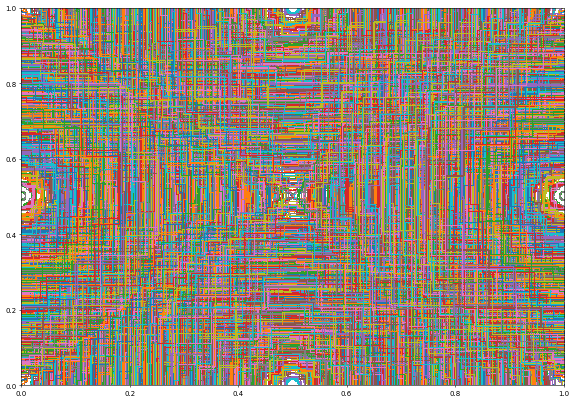

In [133]:
##Param
m, n = 1, 1;
U, T, L = 0.1, 3, 1 # Velocity, Time const, Charact. Lenght
Tmax = 50; dt = 0.01;
N = 500; #Number of tracks


##Meshgrid
x = np.linspace(-m,m,50);
y = np.linspace(-n,n,50);

for ss in xrange(len(x)):
    for zz in xrange(len(y)):
        #Initial Conditions
        xo = x[ss]; yo = y[zz];
        ##Tracks
        X = []; Y = [];
        X.append(xo); Y.append(yo);
        ##Map
        t = 0;
        while t < Tmax:
            tt = t % T;
            if tt <= (T/2):
                vx = U*np.sin( ( 2*np.pi*yo ) / L );
                vy = 0;
            elif tt > (T/2):
                vx = 0;
                vy = U*np.sin( ( 2*np.pi*xo ) / L );
            xo = xo + vx*dt; yo = yo + vy*dt;
            if xo > ( 1 ): xo = xo - 1;
            if xo < ( 0 ): xo = xo + 1;
            if yo > ( 1 ): yo = yo - 1;
            if yo < ( 0 ): yo = yo + 1;
            X.append(xo); Y.append(yo); 
            t += dt;

        ##Figure
        plt.figure(6,figsize=(14, 10), dpi=50);
        plt.plot(X,Y,',');
        plt.ylim(0,m);
        plt.xlim(0,n);